In [304]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [205]:
# load dataset from github
hit = pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')

In [206]:
hit.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [207]:
hit.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [208]:
hit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

### 1. Regularization

Use LASSO regression to predict Salary from the other numeric predictors. \
Create a visualization of the coefficient trajectories. \
Comment on which are the final three predictors that remain in the model. \
Use cross-validation to find the optimal value of the regularization penality. \
How many predictors are left in that model?

In [209]:
## data cleaning and preprocessing
# delete the first column - hitters' name
del hit['Unnamed: 0']
# checking NA values
hit.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

<AxesSubplot:>

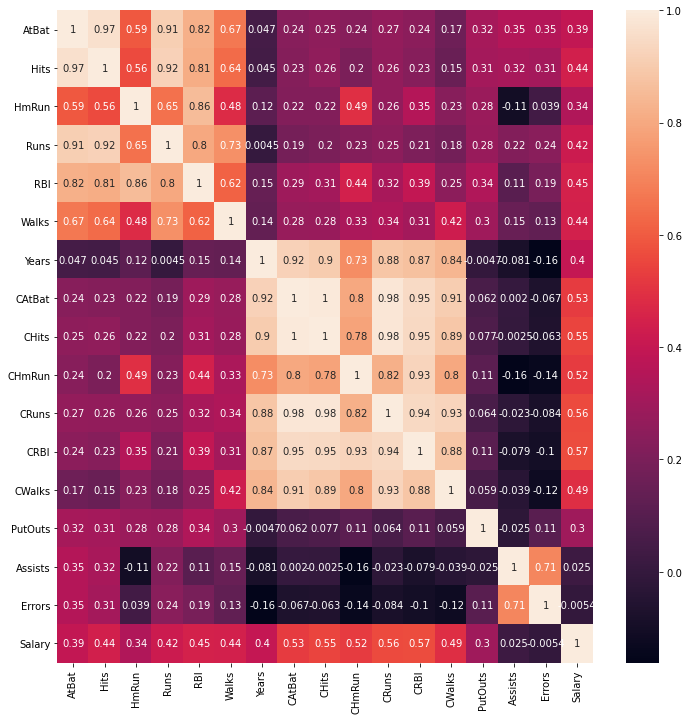

In [210]:
# see that only target variable "Salary" has missing value
# learn about correlation
plt.figure(figsize=(12,12))
sns.heatmap(hit.corr(), annot=True)

In [211]:
# here we just simply drop those observations which contain NA values
hit = hit.dropna()
hit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [212]:
# encoding - three categorical variables
le = LabelEncoder()
hit['League'] = le.fit_transform(hit['League'])
hit['Division'] = le.fit_transform(hit['Division'])
hit['NewLeague'] = le.fit_transform(hit['NewLeague'])

<AxesSubplot:>

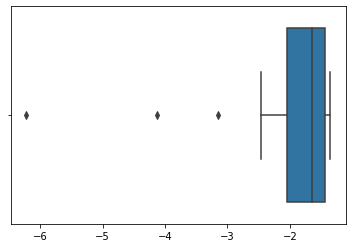

In [213]:
# outlier detection
lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
lof.fit_predict(hit)
lof_scores = lof.negative_outlier_factor_
lof_scores_ = np.sort(lof_scores)[0:20]
sns.boxplot(lof_scores_)

In [214]:
# set threshold and remove outliers
thr = lof_scores_[3]
hit.drop(hit[lof_scores < thr].index, inplace = True)

In [215]:
hit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      260 non-null    int64  
 1   Hits       260 non-null    int64  
 2   HmRun      260 non-null    int64  
 3   Runs       260 non-null    int64  
 4   RBI        260 non-null    int64  
 5   Walks      260 non-null    int64  
 6   Years      260 non-null    int64  
 7   CAtBat     260 non-null    int64  
 8   CHits      260 non-null    int64  
 9   CHmRun     260 non-null    int64  
 10  CRuns      260 non-null    int64  
 11  CRBI       260 non-null    int64  
 12  CWalks     260 non-null    int64  
 13  League     260 non-null    int64  
 14  Division   260 non-null    int64  
 15  PutOuts    260 non-null    int64  
 16  Assists    260 non-null    int64  
 17  Errors     260 non-null    int64  
 18  Salary     260 non-null    float64
 19  NewLeague  260 non-null    int64  
dtypes: float64

In [216]:
# re-order columns
hit = hit[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 
           'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 
           'PutOuts', 'Assists', 'Errors', 'League', 'Division', 'NewLeague', 'Salary']]
hit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,NewLeague,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0,750.0


In [217]:
# normlization
# here we use "Robust Scaler", which is  
# similar to normalization and also robust to outliers.
hit_X = hit.copy()
del hit_X['Salary']
rs = RobustScaler()
X = rs.fit_transform(hit_X)
X = pd.DataFrame(X, columns = hit_X.columns)
y = hit['Salary']

#### 1.1 Lasso

In [285]:
## Lasso regression model to predict "Salary"
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=100)


lasso = Lasso(alpha=2) # ...
model = lasso.fit(X_train,y_train)
y_pred = model.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
lasso_rmse

236.4779021527652

In [286]:
model.coef_

array([-2.13456949e+02,  3.20481140e+02, -1.04942192e+01, -4.42423936e-01,
        0.00000000e+00,  1.32315831e+02, -4.29572460e+01, -0.00000000e+00,
        1.23182422e+02,  1.83431198e+01,  1.82504256e+02,  8.38131338e+01,
       -9.67644363e+01,  5.23358356e+01, -0.00000000e+00, -1.39280146e+01,
        1.47570375e-01, -1.13803737e+02,  0.00000000e+00])

In [287]:
model.intercept_

347.4399737357638

.

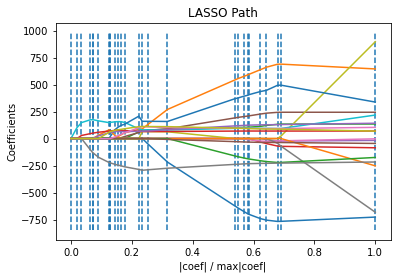

In [288]:
## Create a visualization of the coefficient trajectories.
from sklearn import linear_model
_, active, coefs = linear_model.lars_path(X.values, y.values, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis = 1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [289]:
## which are the final three predictors that remain in the model?
# This is a list of features' name
names = list(X.columns)
# This is a list of the indices of active variables at the end of the path.
active
# make a dictionary 
dict(zip(names, active))

{'AtBat': 9,
 'Hits': 13,
 'HmRun': 17,
 'Runs': 14,
 'RBI': 18,
 'Walks': 10,
 'Years': 16,
 'CAtBat': 1,
 'CHits': 5,
 'CHmRun': 2,
 'CRuns': 0,
 'CRBI': 15,
 'CWalks': 12,
 'PutOuts': 6,
 'Assists': 3,
 'Errors': 4,
 'League': 7,
 'Division': 8,
 'NewLeague': 11}

##### Thus, the final three predictors that remain in the model are "CRuns", "CAtBat", "CHmRun".

In [294]:
## Use cross-validation to find the optimal value of the regularization penality
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=100)

alpha = [0.001,0.01,0.1,0.2,0.3,0.5,0.8,0.9,1,2,5,8,9,10,11,12,20,50,100]
lasso_cv = LassoCV(alphas = alpha, cv = 10, )
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

12.0

In [297]:
# calculation of best alpha
lasso_final = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_final.predict(X_test)
lasso_final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_final_rmse

247.82100666919635

In [332]:
# How many predictors are left in that model?
print("{} predictors are left in that Lasso model.".format(str(np.count_nonzero(lasso_final.coef_))))

6 predictors are left in that Lasso model.


#### 1.2 Ridge

In [305]:
## ridge regression model to predict "Salary"
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=100)


ridge = Ridge(alpha=2) # ...
model = ridge.fit(X_train,y_train)
y_pred = model.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
ridge_rmse

234.87584861486917

In [306]:
model.coef_

array([-184.49798573,  291.79331694,  -29.11274481,  -21.7624231 ,
         20.96456974,  146.3361408 ,  -59.56744096,  -45.96356772,
        180.65383388,   25.503083  ,  197.23994984,   82.50411965,
       -112.36315862,   53.32644521,    1.22190406,  -22.69081202,
         23.40754634, -117.54194026,  -22.39391879])

In [307]:
model.intercept_

349.23861210485916

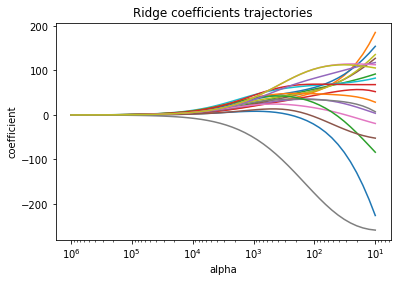

In [319]:
## Create a visualization of the coefficient trajectories.
# the simulation of coefficient paths

n_alphas = 50
alphas = np.logspace(6, 1, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display the result

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.title('Ridge coefficients trajectories')
plt.axis('tight')
plt.show()

In [329]:
## Use cross-validation to find the optimal value of the regularization penality
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=100)

alpha = [0.9,1,2,5,8,9,10,11,12,20,40,49,50,55,100]
ridge_cv = RidgeCV(alphas = alpha, cv = 10)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

50.0

In [330]:
ridge_final = Ridge(alpha = ridge_cv.alpha_).fit(X_train,y_train)
y_pred = ridge_final.predict(X_test)
ridge_final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_final_rmse

246.25905655195567

In [333]:
# How many predictors are left in that model?
print("{} predictors are left in that Ridge model.".format(str(np.count_nonzero(ridge_final.coef_))))

19 predictors are left in that Ridge model.


### 2. Short Answer

Explain in your own words the bias-variance tradeoff. \
What role does regularization play in this tradeoff? \
Make reference to your findings in number (1) to describe models of high/low bias and variance.

1. In machine learning field, bias and variance stand for accuracy and precision as measurements of the model. The lower they are, the better our model is. However, it is difficult to obtain low bias and low variance at the same time in reality. So when we train our model, our goal is finding the balance of these two measurements. This is what the bias-variance tradeoff is.

2. Regularization penalizes the complexity of the model, which means it pushes our model to be simple. This process can avoid overfitting and unbalanced bias-variance.

3. According to the coefficient trajectories of Lasso&Ridge models, we can learn that the coefficients of predictors were initially large, which can cause large variance and small bias (high accuracy) - overfitting. As the change of penalty parameter, the coefficients decrease, the model tends to be balance and the variance decreases as well in some way. This is the process of bias-variance tradeoff.